<a href="https://colab.research.google.com/github/Taiga10969/Lecture-Transformer/blob/main/copy_code_Transformer_02_PositionalEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 写経して理解するTransformer_02：PositionalEncoder

Positional Encodingとは，各トークンが系列中の何番目に位置するのかを表す位置情報を，符号化関数を用いてベクトルの次元数と同じ$d_{model}$次元のベクトルに変換することである．
位置情報を示す符号化関数として正弦波と余弦波を用いた関数が用いられる．
符号化関数$PE$を式に示す．<br>
<br>
$PE_{(pos,2i)}=\sin\left(\frac{pos}{10000^{\frac{2i}{d_{model}}}}\right)$<br>
<br>
$PE_{(pos,2i+1)}=\cos\left(\frac{pos}{10000^{\frac{2i}{d_{model}}}}\right)$<br>
<br>
ここで，$pos$は単語の位置，$i$は各トークンのベクトルにおける各次元のインデックス，$d_{model}$は単語の埋め込み次元数を表す．<br>
この位置情報を示すベクトルを各トークンのベクトルに加算することで，トークンが持つ意味的情報に位置情報を追加する．

## 必要ライブラリのインポート

In [1]:
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## 【PositionalEncoderクラスの定義】

In [2]:
class PositionalEncoder(nn.Module):
    def __init__(self, d_model, max_seq_len):
        super().__init__()

        self.d_model = d_model

        pe = torch.zeros(max_seq_len, d_model)

        for pos in range(max_seq_len):
            for i in range(0, d_model, 2):
                pe[pos, i] = math.sin(pos / (10000 ** ((2*i) / d_model)))
                pe[pos, i+1] = math.cos(pos / (10000 ** ((2*i) / d_model)))

        self.pe = nn.Parameter(pe, requires_grad=False)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        ret = math.sqrt(self.d_model) * x + self.pe[:seq_len, :].unsqueeze(0)
        return ret

    def get_pe(self, x):
        batch_size, seq_len, _ = x.size()
        return self.pe[:seq_len, :].unsqueeze(0)

## PositionalEncoderの挙動確認

In [3]:
# 疑似データ（Embedderによって1batch,7tokenが埋め込まれた，埋め込み次元数128のデータ）
input_data = torch.randn(1, 7, 128)

d_model = 128
max_seq_len = 256
# PositionalEncoderクラスのインスタンス化
pos_encoder = PositionalEncoder(d_model, max_seq_len)

output = pos_encoder(input_data)
print("output.shape", output.shape) # 次元数に変化がないことを確認

# PositionalEncoder の処理の前後のデータの確認
# 0番目のトークンの埋め込みベクトルの最初の5次元を可視化
print("PositionalEncoder before : ", input_data[0][0][:5])
print("PositionalEncoder after  : ", output[0][0][:5])

output.shape torch.Size([1, 7, 128])
PositionalEncoder before :  tensor([-1.1768,  0.8528, -0.3700, -0.0126,  1.5318])
PositionalEncoder after  :  tensor([-13.3142,  10.6486,  -4.1862,   0.8577,  17.3298])


In [4]:
# 付与している位置情報を確認
# PositionalEncoderクラスに実装したget_peメソッドを使う
pe = pos_encoder.get_pe(input_data)
pe.shape

torch.Size([1, 7, 128])

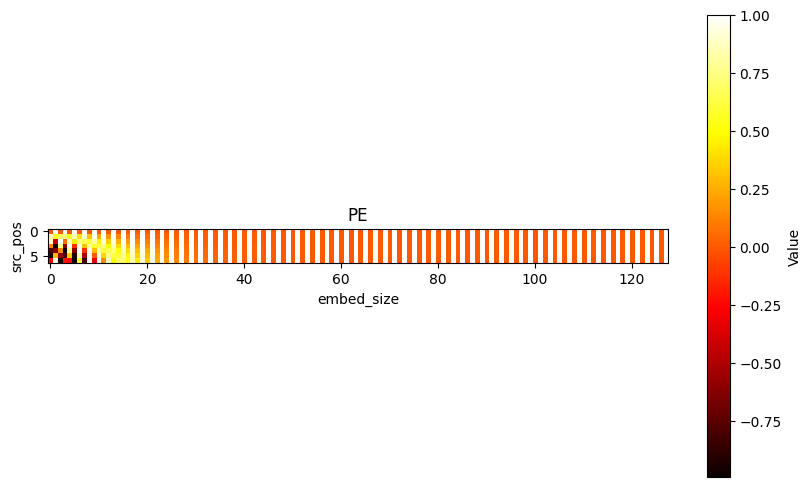

In [5]:
# ヒートマップの描画
plt.figure(figsize=(10, 6))
plt.imshow(pe[0].numpy(), cmap='hot', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('PE')
plt.xlabel('embed_size')
plt.ylabel('src_pos')
plt.show()
